In [66]:
import pandas as pd
from pandas.tseries import converter
converter.register()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  This is separate from the ipykernel package so we can avoid doing imports until


# How did the different covid variants influence the infection occurences?

## Visualize absolute count of covid cases from start

In [67]:
DATEFORMAT = '%Y-%m-%d'

In [68]:
df = pd.read_csv('data/covid_infections/bl_infektionen_long.csv')

In [69]:
df[df['datum'] == '2020-03-01']

,_id,ags2,bundesland,datum,bl_inz,bl_inz_rate,bl_inz_fix,bl_inz_rate_fix
0,1,1,Schleswig-Holstein,2020-03-01,2,0.1,-99,-99.0
832,833,2,Hamburg,2020-03-01,2,0.1,-99,-99.0
1664,1665,3,Niedersachsen,2020-03-01,1,0.0,-99,-99.0
2496,2497,4,Bremen,2020-03-01,1,0.1,-99,-99.0
3328,3329,5,Nordrhein-Westfalen,2020-03-01,92,0.5,-99,-99.0
4160,4161,6,Hessen,2020-03-01,4,0.1,-99,-99.0
4992,4993,7,Rheinland-Pfalz,2020-03-01,2,0.0,-99,-99.0
5824,5825,8,Baden-Württemberg,2020-03-01,22,0.2,-99,-99.0
6656,6657,9,Freistaat Bayern,2020-03-01,9,0.1,-99,-99.0
7488,7489,10,Saarland,2020-03-01,2,0.2,-99,-99.0


In [70]:
df_inz_total = df.groupby('datum').sum()

In [71]:
df_inz_total.head()

,_id,ags2,bl_inz,bl_inz_rate,bl_inz_fix,bl_inz_rate_fix
datum,,,,,,
2020-03-01,99856,136,140,1.5,-1584,-1584.0
2020-03-02,99872,136,182,1.9,-1584,-1584.0
2020-03-03,99888,136,263,3.5,-1584,-1584.0
2020-03-04,99904,136,412,4.7,-1584,-1584.0
2020-03-05,99920,136,574,6.3,-1584,-1584.0


In [72]:
df_inz_total = df_inz_total.reset_index()

In [73]:
df_inz_total.datum = pd.to_datetime(df_inz_total.datum, format=DATEFORMAT)

In [74]:
df_inz_total.datum.dtype

dtype('<M8[ns]')

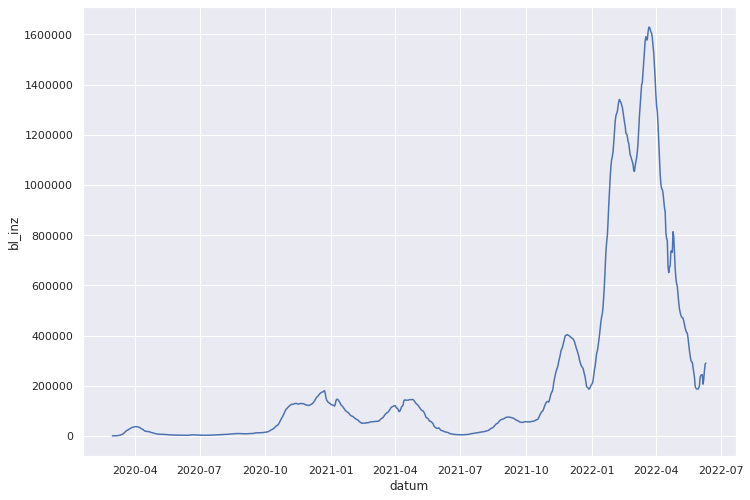

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_inz_total, x='datum', y='bl_inz')

## Visualize relevant events in pandemic

In [76]:
from datetime import datetime

In [77]:
PANDEMIC_START = datetime.strptime('2020-03-01', DATEFORMAT)
# Dominant ~ when variant over 50% of infections
# https://www1.wdr.de/nachrichten/corona-virus-varianten-ueberblick-100.html
DOMINANT_ALPHA = datetime.strptime('2021-03-08', DATEFORMAT)
DOMINANT_DELTA = datetime.strptime('2021-06-21', DATEFORMAT)
DOMINANT_OMIKRON = datetime.strptime('2022-01-01', DATEFORMAT)

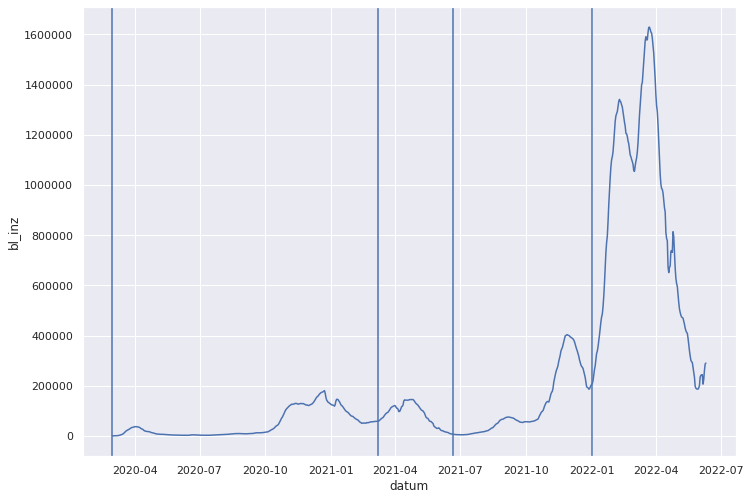

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_inz_total, x='datum', y='bl_inz')
plt.axvline(PANDEMIC_START) # 1
plt.axvline(DOMINANT_ALPHA) # 2
plt.axvline(DOMINANT_DELTA) # 3
plt.axvline(DOMINANT_OMIKRON) # 4
plt.show()

## Visualize dominant variants in comparison over the year

In [79]:
## TODO: Plot with lines color coded for dominant variant and on monthly bases where year is ignored
# add column for dominant variant indicator
df_inz_total['dominant_variant'] = 0
df_inz_total.loc[((df_inz_total['datum'] >= PANDEMIC_START) & 
                 (df_inz_total['datum'] < DOMINANT_ALPHA)), 'dominant_variant'] = 1
df_inz_total.loc[((df_inz_total['datum'] >= DOMINANT_ALPHA) & 
                 (df_inz_total['datum'] < DOMINANT_DELTA)), 'dominant_variant'] = 2
df_inz_total.loc[((df_inz_total['datum'] >= DOMINANT_DELTA) & 
                 (df_inz_total['datum'] < DOMINANT_OMIKRON)), 'dominant_variant'] = 3
df_inz_total.loc[(df_inz_total['datum'] >= DOMINANT_OMIKRON), 'dominant_variant'] = 4

In [80]:
# add column for day of year (ignoring year)
df_inz_total['day_of_year'] = df_inz_total['datum'].apply(lambda x: x.timetuple().tm_yday)

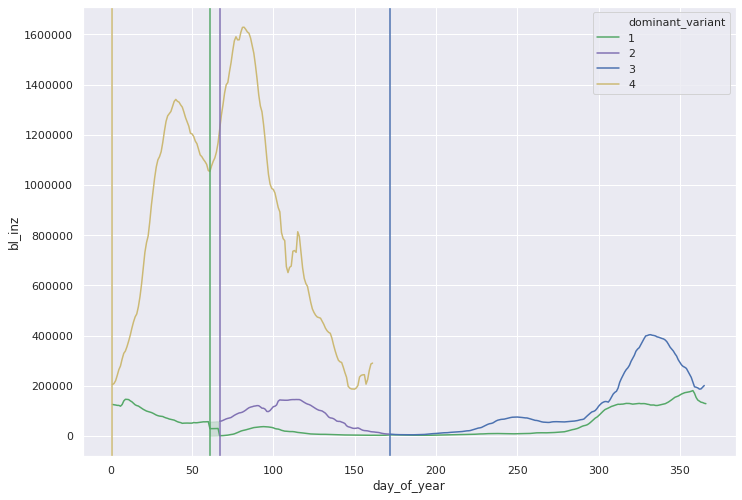

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_inz_total, x='day_of_year', y='bl_inz', hue='dominant_variant',
            palette={1: 'g', 2: 'm', 3: 'b', 4: 'y'})
plt.axvline(PANDEMIC_START.timetuple().tm_yday, c='g') # 1
plt.axvline(DOMINANT_ALPHA.timetuple().tm_yday, c='m') # 2
plt.axvline(DOMINANT_DELTA.timetuple().tm_yday, c='b') # 3
plt.axvline(DOMINANT_OMIKRON.timetuple().tm_yday, c='y') # 4
plt.show()

In [82]:
# aggregate to calender week level
df_inz_total['year'] = df_inz_total['datum'].apply(lambda x: x.isocalendar()[0])
df_inz_total['week'] = df_inz_total['datum'].apply(lambda x: x.isocalendar()[1])

In [83]:
df_inz_total_week = df_inz_total.groupby(['year', 'week']).sum()
del df_inz_total_week['day_of_year']
del df_inz_total_week['dominant_variant']
df_inz_total_week = df_inz_total_week.reset_index()
df_inz_total_week.head()

,year,week,_id,ags2,bl_inz,bl_inz_rate,bl_inz_fix,bl_inz_rate_fix
0,2020,9,99856,136,140,1.5,-1584,-1584.0
1,2020,10,699440,952,3884,42.9,-11088,-11088.0
2,2020,11,700224,952,24770,395.7,-11088,-11088.0
3,2020,12,701008,952,111184,1777.2,-11088,-11088.0
4,2020,13,701792,952,206885,3252.6,-11088,-11088.0


In [84]:
df_inz_total_week['datum'] = df_inz_total_week.apply(lambda x: "{}-{}-1".format(int(x['year']), int(x['week']))
                                                     , axis=1)
df_inz_total_week['datum'] = df_inz_total_week['datum'].apply(lambda x: datetime.strptime(x, "%Y-%W-%w"))

In [85]:
# add column for dominant variant indicator for new dataframe
df_inz_total_week['dominant_variant'] = 0
df_inz_total_week.loc[((df_inz_total_week['datum'] >= PANDEMIC_START) & 
                 (df_inz_total_week['datum'] < DOMINANT_ALPHA)), 'dominant_variant'] = 1
df_inz_total_week.loc[((df_inz_total_week['datum'] >= DOMINANT_ALPHA) & 
                 (df_inz_total_week['datum'] < DOMINANT_DELTA)), 'dominant_variant'] = 2
df_inz_total_week.loc[((df_inz_total_week['datum'] >= DOMINANT_DELTA) & 
                 (df_inz_total_week['datum'] < DOMINANT_OMIKRON)), 'dominant_variant'] = 3
df_inz_total_week.loc[(df_inz_total_week['datum'] >= DOMINANT_OMIKRON), 'dominant_variant'] = 4

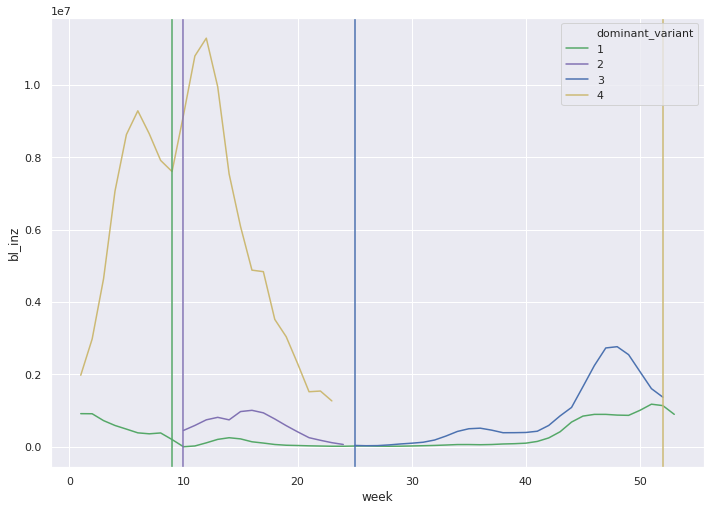

In [86]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_inz_total_week, x='week', y='bl_inz', hue='dominant_variant',
            palette={1: 'g', 2: 'm', 3: 'b', 4: 'y'})
plt.axvline(PANDEMIC_START.isocalendar()[1], c='g') # 1
plt.axvline(DOMINANT_ALPHA.isocalendar()[1], c='m') # 2
plt.axvline(DOMINANT_DELTA.isocalendar()[1], c='b') # 3
plt.axvline(DOMINANT_OMIKRON.isocalendar()[1], c='y') # 4
plt.show()

In [87]:
df_inz_total_week.groupby(['dominant_variant']).bl_inz.median()

dominant_variant
1     108200.0
2     591604.0
3     446861.5
4    6084576.0
Name: bl_inz, dtype: float64

### Same visualization but with percentage of positive tests 

In [88]:
## TODO: Put infection cases in relation to amount of tests
df_tests = pd.read_csv('data/covid_tests/covid_tests.csv', sep=';')

In [89]:
df_tests.head()

,Kalenderwoche,Anzahl Testungen,Positiv getestet,Positivenanteil,Anzahl übermittelnder Labore
0,11/2020,129291,7502,5.802415,119
1,12/2020,374534,25886,6.911522,154
2,13/2020,377599,33139,8.776241,159
3,14/2020,417646,37649,9.014572,163
4,15/2020,383694,30727,8.008204,174


In [90]:
df_tests['year'] = df_tests['Kalenderwoche'].apply(lambda x: int(x.split('/')[1]))
df_tests['week'] = df_tests['Kalenderwoche'].apply(lambda x: int(x.split('/')[0]))

In [91]:
df_tests['datum'] = df_tests.apply(lambda x: "{}-{}-1".format(int(x['year']), int(x['week']))
                                                     , axis=1)
df_tests['datum'] = df_tests['datum'].apply(lambda x: datetime.strptime(x, "%Y-%W-%w"))

In [92]:
# add column for dominant variant indicator for new dataframe
df_tests['dominant_variant'] = 0
df_tests.loc[((df_tests['datum'] >= PANDEMIC_START) & 
                 (df_tests['datum'] < DOMINANT_ALPHA)), 'dominant_variant'] = 1
df_tests.loc[((df_tests['datum'] >= DOMINANT_ALPHA) & 
                 (df_tests['datum'] < DOMINANT_DELTA)), 'dominant_variant'] = 2
df_tests.loc[((df_tests['datum'] >= DOMINANT_DELTA) & 
                 (df_tests['datum'] < DOMINANT_OMIKRON)), 'dominant_variant'] = 3
df_tests.loc[(df_tests['datum'] >= DOMINANT_OMIKRON), 'dominant_variant'] = 4

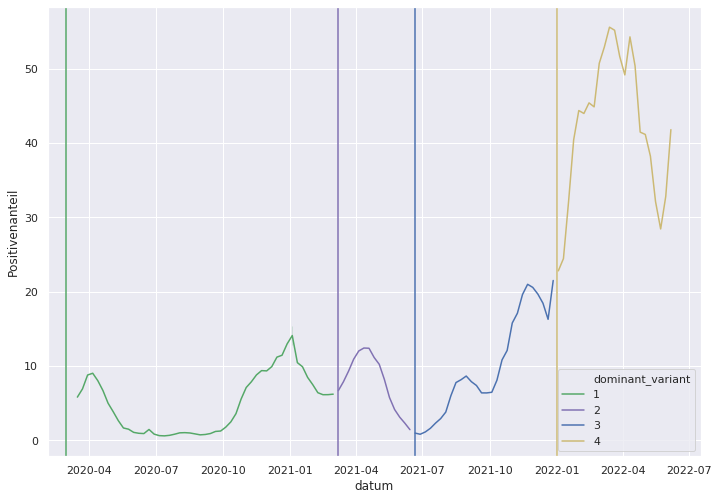

In [93]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_tests, x='datum', y='Positivenanteil', hue='dominant_variant',
            palette={1: 'g', 2: 'm', 3: 'b', 4: 'y'})
plt.axvline(PANDEMIC_START, c='g') # 1
plt.axvline(DOMINANT_ALPHA, c='m') # 2
plt.axvline(DOMINANT_DELTA, c='b') # 3
plt.axvline(DOMINANT_OMIKRON, c='y') # 4
plt.show()

In [94]:
df_tests.to_csv('data/covid_tests/covid_tests_preprocessed.csv', sep=',', index=False)

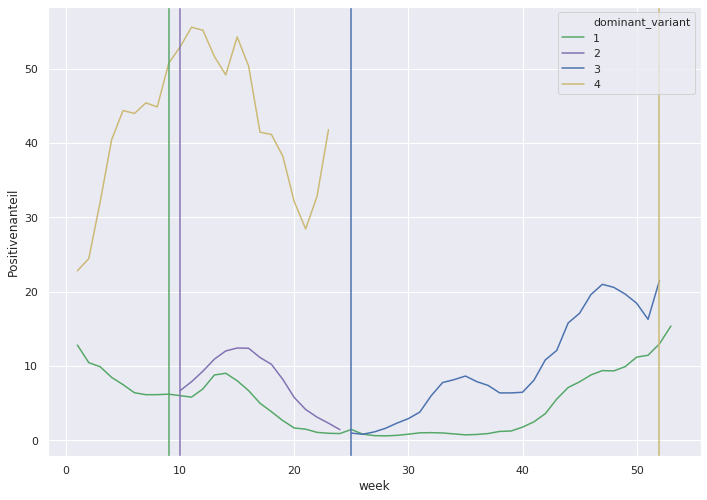

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_tests, x='week', y='Positivenanteil', hue='dominant_variant',
            palette={1: 'g', 2: 'm', 3: 'b', 4: 'y'})
plt.axvline(PANDEMIC_START.isocalendar()[1], c='g') # 1
plt.axvline(DOMINANT_ALPHA.isocalendar()[1], c='m') # 2
plt.axvline(DOMINANT_DELTA.isocalendar()[1], c='b') # 3
plt.axvline(DOMINANT_OMIKRON.isocalendar()[1], c='y') # 4
plt.show()

### Same visualization but with hospitalization (in last seven days - similar to covid cases)

In [96]:
## TODO: Do same plots with hospitalization instead of infection cases
df_hosp = pd.read_csv('data/hospitalization/hospitalization.csv', sep=',')
df_hosp.head()

,_id,ags2,bundesland,datum,bl_hosp,bl_hosp_a0004,bl_hosp_a0514,bl_hosp_a1534,bl_hosp_a3559,bl_hosp_a6079,...,bl_hosp_inz_a6079,bl_hosp_inz_a80,bl_hosp_fix,bl_hosp_adj,bl_hosp_adj_c95_ug,bl_hosp_adj_c95_og,bl_hosp_inz_fix,bl_hosp_inz_adj,bl_hosp_inz_adj_c95_ug,bl_hosp_inz_adj_c95_og
0,1,1,Schleswig-Holstein,2020-03-01,1,0,0,0,0,1,...,0.15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Schleswig-Holstein,2020-03-02,1,0,0,0,0,1,...,0.15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,Schleswig-Holstein,2020-03-03,1,0,0,0,0,1,...,0.15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,Schleswig-Holstein,2020-03-04,2,0,0,0,1,1,...,0.15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,Schleswig-Holstein,2020-03-05,2,0,0,0,1,1,...,0.15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df_hosp_total = df_hosp.groupby('datum').sum()

In [98]:
df_hosp_total = df_hosp_total.reset_index()
df_hosp_total.datum = pd.to_datetime(df_hosp_total.datum, format=DATEFORMAT)
df_hosp_total.head()

,datum,_id,ags2,bl_hosp,bl_hosp_a0004,bl_hosp_a0514,bl_hosp_a1534,bl_hosp_a3559,bl_hosp_a6079,bl_hosp_a80,...,bl_hosp_inz_a6079,bl_hosp_inz_a80,bl_hosp_fix,bl_hosp_adj,bl_hosp_adj_c95_ug,bl_hosp_adj_c95_og,bl_hosp_inz_fix,bl_hosp_inz_adj,bl_hosp_inz_adj_c95_ug,bl_hosp_inz_adj_c95_og
0,2020-03-01,29673,45,20,0,0,8,10,2,0,...,0.18,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-02,98884,136,29,0,0,11,15,3,0,...,0.22,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-03,98900,136,47,0,0,16,23,7,1,...,0.37,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-04,98916,136,65,0,0,17,34,13,1,...,0.70,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-05,98932,136,77,0,0,17,41,17,2,...,0.91,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


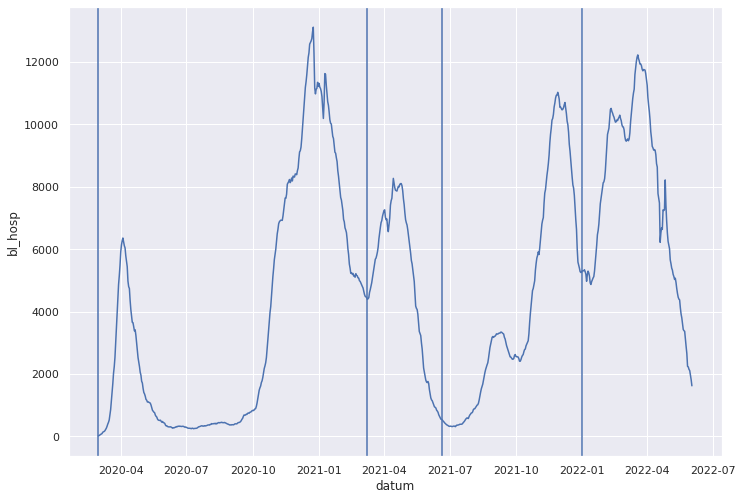

In [99]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_hosp_total, x='datum', y='bl_hosp')
plt.axvline(PANDEMIC_START) # 1
plt.axvline(DOMINANT_ALPHA) # 2
plt.axvline(DOMINANT_DELTA) # 3
plt.axvline(DOMINANT_OMIKRON) # 4
plt.show()

In [100]:
# aggregate to calender week level
df_hosp_total['year'] = df_hosp_total['datum'].apply(lambda x: x.isocalendar()[0])
df_hosp_total['week'] = df_hosp_total['datum'].apply(lambda x: x.isocalendar()[1])
df_hosp_total_week = df_hosp_total.groupby(['year', 'week']).sum()
df_hosp_total_week = df_hosp_total_week.reset_index()

In [101]:
# Add date for calender week
df_hosp_total_week['datum'] = df_hosp_total_week.apply(lambda x: "{}-{}-1".format(int(x['year']), int(x['week']))
                                                     , axis=1)
df_hosp_total_week['datum'] = df_hosp_total_week['datum'].apply(lambda x: datetime.strptime(x, "%Y-%W-%w"))

# add column for dominant variant indicator for new dataframe
df_hosp_total_week['dominant_variant'] = 0
df_hosp_total_week.loc[((df_hosp_total_week['datum'] >= PANDEMIC_START) & 
                 (df_hosp_total_week['datum'] < DOMINANT_ALPHA)), 'dominant_variant'] = 1
df_hosp_total_week.loc[((df_hosp_total_week['datum'] >= DOMINANT_ALPHA) & 
                 (df_hosp_total_week['datum'] < DOMINANT_DELTA)), 'dominant_variant'] = 2
df_hosp_total_week.loc[((df_hosp_total_week['datum'] >= DOMINANT_DELTA) & 
                 (df_hosp_total_week['datum'] < DOMINANT_OMIKRON)), 'dominant_variant'] = 3
df_hosp_total_week.loc[(df_hosp_total_week['datum'] >= DOMINANT_OMIKRON), 'dominant_variant'] = 4

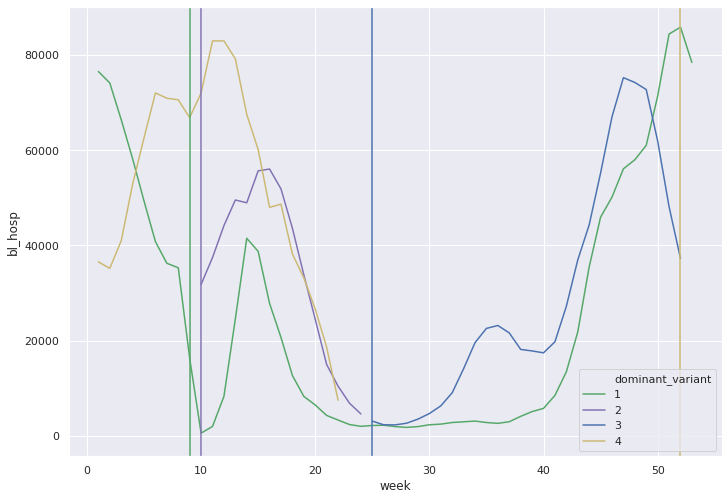

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_hosp_total_week, x='week', y='bl_hosp', hue='dominant_variant',
            palette={1: 'g', 2: 'm', 3: 'b', 4: 'y'})
plt.axvline(PANDEMIC_START.isocalendar()[1], c='g') # 1
plt.axvline(DOMINANT_ALPHA.isocalendar()[1], c='m') # 2
plt.axvline(DOMINANT_DELTA.isocalendar()[1], c='b') # 3
plt.axvline(DOMINANT_OMIKRON.isocalendar()[1], c='y') # 4
plt.show()

In [103]:
df_hosp_total_week.groupby(['dominant_variant']).bl_hosp.median()

dominant_variant
1    10597.5
2    37465.0
3    20706.0
4    56495.0
Name: bl_hosp, dtype: float64

In [104]:
# join hospitalization with positive tested
df_positive_hosp_week = pd.merge(df_tests[['year', 'week', 'datum', 'dominant_variant', 'Positiv getestet']], df_hosp_total_week[['year', 'week', 'bl_hosp']], how='left', on=['year', 'week'])

In [105]:
df_positive_hosp_week['test_hosp_ratio'] = df_positive_hosp_week['bl_hosp'] / df_positive_hosp_week['Positiv getestet']

In [106]:
# Median Weekly positive tests per variant
df_tests.groupby(['dominant_variant'])['Positiv getestet'].median()

dominant_variant
1     24305.0
2    108192.0
3     71665.5
4    765812.0
Name: Positiv getestet, dtype: float64

In [107]:
# Median Weekly conducted tests per variant
df_tests.groupby(['dominant_variant'])['Anzahl Testungen'].median()

dominant_variant
1    1058206.0
2    1226169.0
3     962275.5
4    1873409.0
Name: Anzahl Testungen, dtype: float64

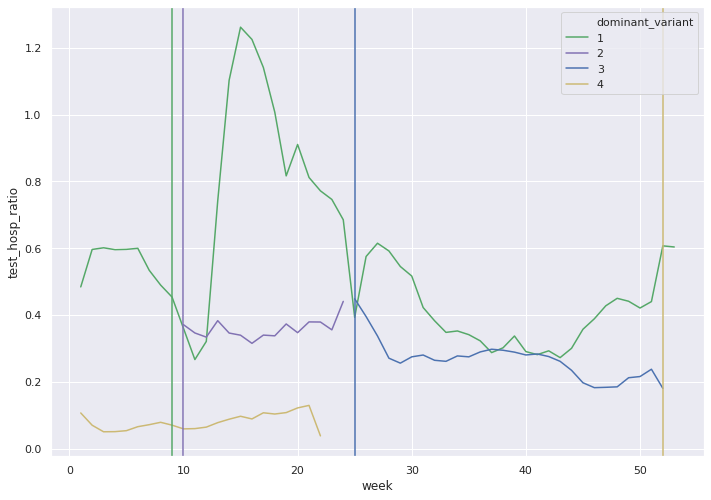

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_positive_hosp_week, x='week', y='test_hosp_ratio', hue='dominant_variant',
            palette={1: 'g', 2: 'm', 3: 'b', 4: 'y'})
plt.axvline(PANDEMIC_START.isocalendar()[1], c='g') # 1
plt.axvline(DOMINANT_ALPHA.isocalendar()[1], c='m') # 2
plt.axvline(DOMINANT_DELTA.isocalendar()[1], c='b') # 3
plt.axvline(DOMINANT_OMIKRON.isocalendar()[1], c='y') # 4
plt.show()

In [109]:
df_positive_hosp_week.to_csv('data/covid_tests/hosp_positive_preprocessed.csv', sep=',', index=False)

Omikron resulted in much less hospitalization cases in relation to the cases of positivly tested persons. This can be partially explained by the higher rate of tests conducted per week in the omikron phase. But still it seems that Omikron resulted in much more positive tests and at the same time much less hospital cases.

# Did the pandemic change different social and economic indicators?

## BIP before and after pandemic

In [110]:
df_bip = pd.read_csv('data/BIP/BIP_genesis_dataset_X13_in_preisen.csv', sep=';', index_col=0)

In [111]:
df_bip = df_bip.transpose().reset_index()
df_bip.head()

year,index,quarter,Bruttowertschöpfung,Gütersteuern abzügl. Gütersubventionen,Gütersteuern,Gütersubventionen,Bruttoinlandsprodukt,nachr.: Bruttoinlandsprodukt (Veränderung in %),nachr.: Bruttoinlandsprodukt je Einwohner
0,2016,1. Quartal,696.421,77.935,-,-,774.356,1.3,9418
1,2016.1,2. Quartal,703.035,77.255,-,-,780.29,0.8,9479
2,2016.2,3. Quartal,706.18,78.098,-,-,784.278,0.5,9519
3,2016.3,4. Quartal,711.014,78.977,-,-,789.991,0.7,9580
4,2017,1. Quartal,719.828,81.819,-,-,801.647,1.5,9711


In [112]:
df_bip.columns.name = ''
cols = df_bip.columns.tolist()
cols[0] = 'years'
df_bip.columns = cols

In [113]:
df_bip.quarter = df_bip.quarter.apply(lambda x: int(x.split('.')[0]))
df_bip.years = df_bip.years.apply(lambda x: int(x.split('.')[0]))

date_col = df_bip.apply(lambda x: "{}-Q{}".format(int(x['years']), int(x['quarter'])), axis=1)
df_bip['date'] = pd.to_datetime(date_col)

In [114]:
df_bip.tail()

,years,quarter,Bruttowertschöpfung,Gütersteuern abzügl. Gütersubventionen,Gütersteuern,Gütersubventionen,Bruttoinlandsprodukt,nachr.: Bruttoinlandsprodukt (Veränderung in %),nachr.: Bruttoinlandsprodukt je Einwohner,date
23,2021,4,822.322,94.901,-,-,917.223,0.7,11018,2021-10-01
24,2022,1,830.125,94.936,-,-,925.061,0.9,11114,2022-01-01
25,2022,2,...,...,-,-,...,...,...,2022-04-01
26,2022,3,...,...,-,-,...,...,...,2022-07-01
27,2022,4,...,...,-,-,...,...,...,2022-10-01


In [115]:
df_bip = df_bip.iloc[:25]

In [116]:
df_bip.loc[:, 'Bruttoinlandsprodukt'] = df_bip['Bruttoinlandsprodukt'].astype(float)
df_bip.loc[:, 'Bruttowertschöpfung'] = df_bip['Bruttowertschöpfung'].astype(float)
df_bip.loc[:, 'nachr.: Bruttoinlandsprodukt (Veränderung in %)'] = df_bip['nachr.: Bruttoinlandsprodukt (Veränderung in %)'].astype(float)

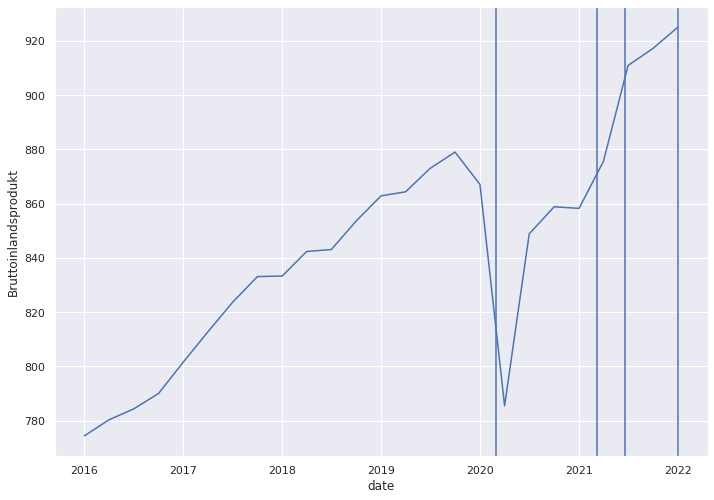

In [117]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_bip, x='date', y='Bruttoinlandsprodukt')
plt.axvline(PANDEMIC_START) # 1
plt.axvline(DOMINANT_ALPHA) # 2
plt.axvline(DOMINANT_DELTA) # 3
plt.axvline(DOMINANT_OMIKRON) # 4
plt.show()

In [118]:
df_bip.to_csv('data/covid_tests/bip_preprocessed.csv', sep=',', index=False)

In [119]:
df_bip.groupby('years')['Bruttoinlandsprodukt'].median()

years
2016    782.2840
2017    818.1320
2018    842.7075
2019    868.6660
2020    853.8430
2021    893.2565
2022    925.0610
Name: Bruttoinlandsprodukt, dtype: float64

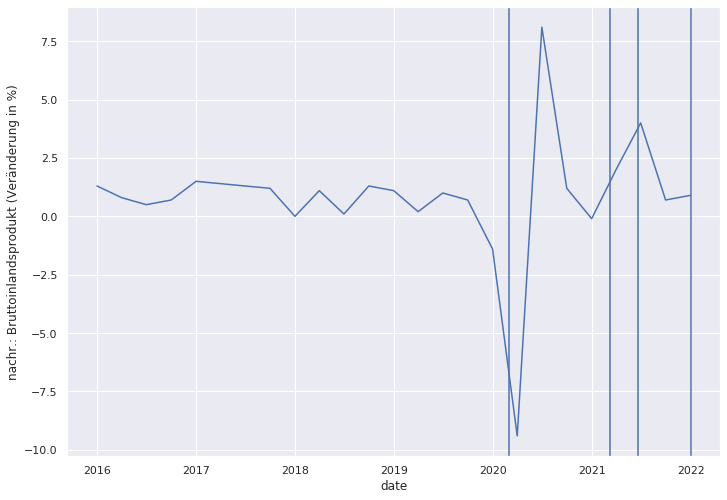

In [120]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_bip, x='date', y='nachr.: Bruttoinlandsprodukt (Veränderung in %)')
plt.axvline(PANDEMIC_START) # 1
plt.axvline(DOMINANT_ALPHA) # 2
plt.axvline(DOMINANT_DELTA) # 3
plt.axvline(DOMINANT_OMIKRON) # 4
plt.show()

In [121]:
df_bip.groupby('years')['nachr.: Bruttoinlandsprodukt (Veränderung in %)'].median()

years
2016    0.75
2017    1.35
2018    0.60
2019    0.85
2020   -0.10
2021    1.35
2022    0.90
Name: nachr.: Bruttoinlandsprodukt (Veränderung in %), dtype: float64

## Amount of crimes (e.g. specific types like discrimination) before and after pandemic

In [122]:
# looking into cases that relate to discrimination (http://www.agg-ratgeber.de/de/ihre-rechte/strafrecht.html)
# Straftat Kategorie: Beleidigung: 673000/(673100), Üble Nachrede: 673020/(673120), Nötigung 232200/(232279)
df_crime_2018 = pd.read_csv('data/BKA/2018_Faelle.csv', sep=';', header=1, encoding='iso-8859-1')

In [123]:
df_crime_2018.head()

,Schluessel,Straftat,erfasste Faelle,%-Anteil an allen Faellen,von Spalte 3 Versuche Anzahl,von Spalte 3 Versuche in %,Tatortverteilung bis unter 20000 Einwohner,Tatortverteilung 20000 bis unter 100000 Einwohner,Tatortverteilung 100000 bis unter 500000 Einwohner,Tatortverteilung 500000 und mehr Einwohner,Tatortverteilung unbekannt,mit Schusswaffe gedroht,mit Schusswaffe geschossen,Aufklaerung - Faelle,Aufklaerung in % (Aufklaerungsquote),Tatverdaechtige insgesamt,Tatverdaechtige maennlich,Tatverdaechtige weiblich,Anzahl nichtdeutsche Tatverdaechtige,Anteil nichtdeutsche Tatverdaechtige an Gesamtzahl in %
0,------,Straftaten insgesamt,"5,555,520",100.0,"423,408",7.6,"1,263,346","1,483,814","1,106,157","1,600,300","101,903","3,819","4,524","3,206,507",57.7,"2,051,266","1,541,130","510,136","708,380",34.5
1,0,Straftaten gegen das Leben,"3,254",0.1,"1,968",60.5,"1,069",967,548,659,11,4,109,"3,007",92.4,"3,721","3,122",599,"1,362",36.6
2,10000,Mord § 211 StGB,901,0.0,649,72.0,362,227,124,181,7,0,45,859,95.3,853,746,107,329,38.6
3,10079,Sonstiger Mord,851,0.0,622,73.1,342,213,118,171,7,0,42,811,95.3,764,661,103,296,38.7
4,11000,Mord im Zusammenhang mit Raubdelikten,42,0.0,24,57.1,17,12,3,10,0,0,3,40,95.2,82,78,4,34,41.5


In [124]:
df_crime_2018 = df_crime_2018[['Schluessel', 'Straftat', 'erfasste Faelle']]
df_crime_2018['year'] = 2018
df_crime_2018.loc[:, 'erfasste Faelle'] = df_crime_2018['erfasste Faelle'].apply(lambda x: int(x.replace(',', '')))

In [125]:
df_crime_2019 = pd.read_csv('data/BKA/2019_Faelle.csv', sep=';', header=1, encoding='iso-8859-1')
df_crime_2019 = df_crime_2019[['Schluessel', 'Straftat', 'erfasste Faelle']]
df_crime_2019['year'] = 2019
df_crime_2019.loc[:, 'erfasste Faelle'] = df_crime_2019['erfasste Faelle'].apply(lambda x: int(x.replace(',', '')))

In [126]:
df_crime_2020 = pd.read_csv('data/BKA/2020_Faelle.csv', sep=';', header=1, encoding='iso-8859-1')
df_crime_2020 = df_crime_2020[['Schluessel', 'Straftat', 'Anzahl erfasste Faelle']]
df_crime_2020['year'] = 2020
df_crime_2020.loc[:, 'Anzahl erfasste Faelle'] = df_crime_2020['Anzahl erfasste Faelle'].apply(lambda x: int(x.replace(',', '')))
cols = df_crime_2020.columns.tolist()
cols[2] = 'erfasste Faelle'
df_crime_2020.columns = cols

In [127]:
df_crime_2021 = pd.read_csv('data/BKA/2021_Faelle.csv', sep=';', header=1, encoding='iso-8859-1')
df_crime_2021 = df_crime_2021[['Schluessel', 'Straftat', 'Anzahl erfasste Faelle']]
df_crime_2021['year'] = 2021
df_crime_2021.loc[:, 'Anzahl erfasste Faelle'] = df_crime_2021['Anzahl erfasste Faelle'].apply(lambda x: int(x.replace(',', '')))
cols = df_crime_2021.columns.tolist()
cols[2] = 'erfasste Faelle'
df_crime_2021.columns = cols

In [128]:
df_crime = pd.concat([df_crime_2018, df_crime_2019, df_crime_2020, df_crime_2021])

In [129]:
df_crime[df_crime['Schluessel'] == '673000']

,Schluessel,Straftat,erfasste Faelle,year
722,673000,"Beleidigung §§ 185-187, 189 StGB",220291,2018
722,673000,"Beleidigung §§ 185-187, 189 StGB",218905,2019
722,673000,"Beleidigung §§ 185-187, 189 StGB",240575,2020
720,673000,"Beleidigung §§ 185-187, 189 StGB",235335,2021


In [130]:
df_crime[df_crime['Schluessel'] == '232200']

,Schluessel,Straftat,erfasste Faelle,year
183,232200,Nötigung § 240 StGB,66881,2018
183,232200,Nötigung § 240 StGB,66302,2019
183,232200,Nötigung § 240 StGB,69467,2020
184,232200,Nötigung § 240 StGB,66601,2021


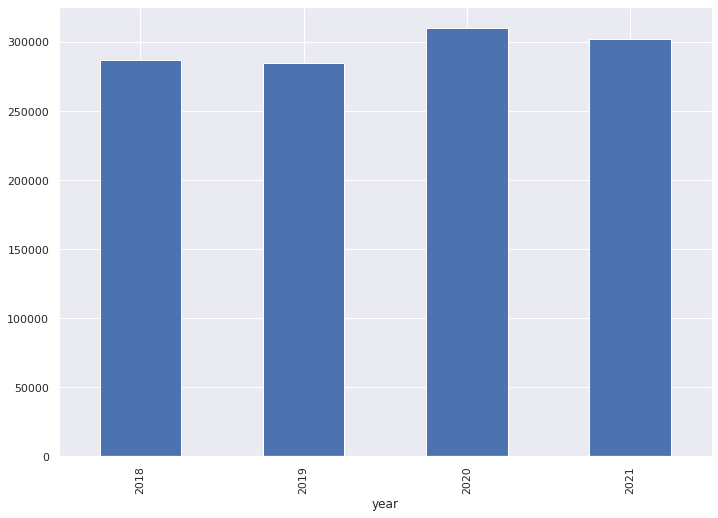

In [131]:
df_crime[((df_crime['Schluessel'] == '673000') | (df_crime['Schluessel'] == '232200'))]\
.groupby('year')['erfasste Faelle'].sum()\
.plot(kind='bar')